We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2021-05-15 12:05:20--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:e000:1d:d83a:40c0:93a1, 2600:9000:21c7:ca00:1d:d83a:40c0:93a1, 2600:9000:21c7:ce00:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:e000:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
5 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
6 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
7 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
8 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
9 2020-12-05    5     12  2020    235      18             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2                                           6.868768           
3                                           7.134266           
4                                           6.968658           
5                                           6.963401           
6                                           7.094835           
7                                           7.215755           
8                                           7.326160           
9                                           7.115865

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61900
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-01   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-02   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-03   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-04   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-10  35.0  1313.0  202.0  0.0  0.0  752.0  1174.0   75.0  5303.0   
2020-12-11  28.0  1255.0   63.0  0.0  0.0  873.0  1077.0  121.0  6994.0   
2020-12-12  46.0  1196.0  113.0  1.0  0.0  802.0   995.0  136.0  7112.0   
2020-12-13  52.0  1154.0  298.0  1.0  0.0  879.0  1013.0  100.0  5274.0   
2020-12-14  50.0  1194.0  746.0  0.0  0.0  788.0   357.0   27.0  3558.0   

                    ... deaths                                                  
geoId           AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   ZW  
dateRep             ...                                                         
2019-12-31     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-12-10  2913.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0  142.0  0.0  1.0  
2020-12-11  2466.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  173.0  0.0  1.0  
2020-12-12  3026.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  205.0  1.0  1.0  
2020-12-13  2938.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  154.0  1.0  1.0  
2020-12-14  3005.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  170.0  1.0  0.0  

[350 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2021-12-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2021-12-10 NaN NaN NaN NaN NaN NaN NaN  
2021-12-11 NaN NaN NaN NaN NaN NaN NaN  
2021-12-12 NaN NaN NaN NaN NaN NaN NaN  
2021-12-13 NaN NaN NaN NaN NaN NaN NaN  
2021-12-14 NaN NaN NaN NaN NaN NaN NaN  

[715 rows x 428 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    715.000000
mean     357.000000
std      206.547008
min        0.000000
25%      178.500000
50%      357.000000
75%      535.500000
max      714.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

wave = -1

df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

plotlist = [(smeasure, country), (pmeasure, country)]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [10]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
#mincases = popdata / 1e6
#mincases = 100
mincases = 2
#mincases = max(popdata / 1e6, 2)
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 2


# Iterate here

In [11]:
wave += 1
curwave = wmeasure + str(wave)
df_geo[(curwave, country)] = 0
plotlist += [(curwave, country)]

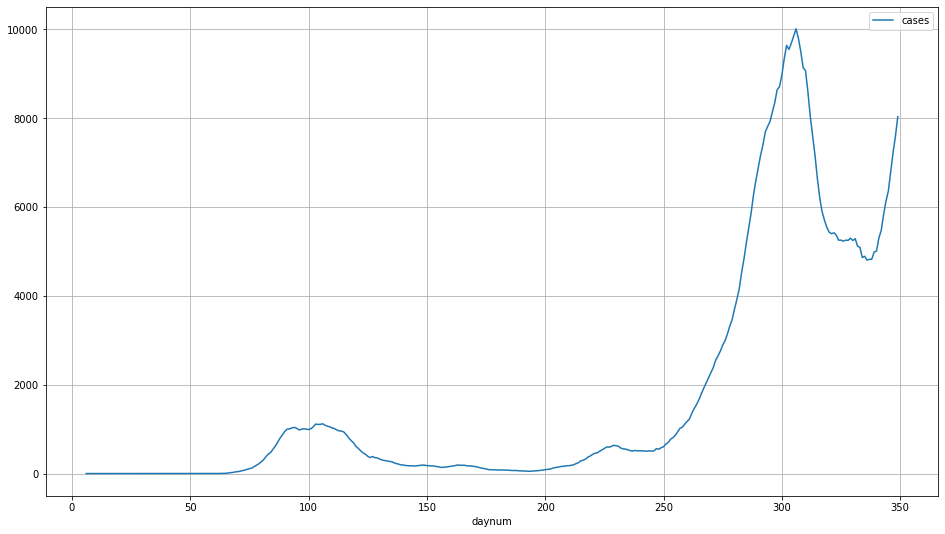

In [12]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred.plot(x='daynum', y=measure, figsize=(16, 9), grid=True)

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

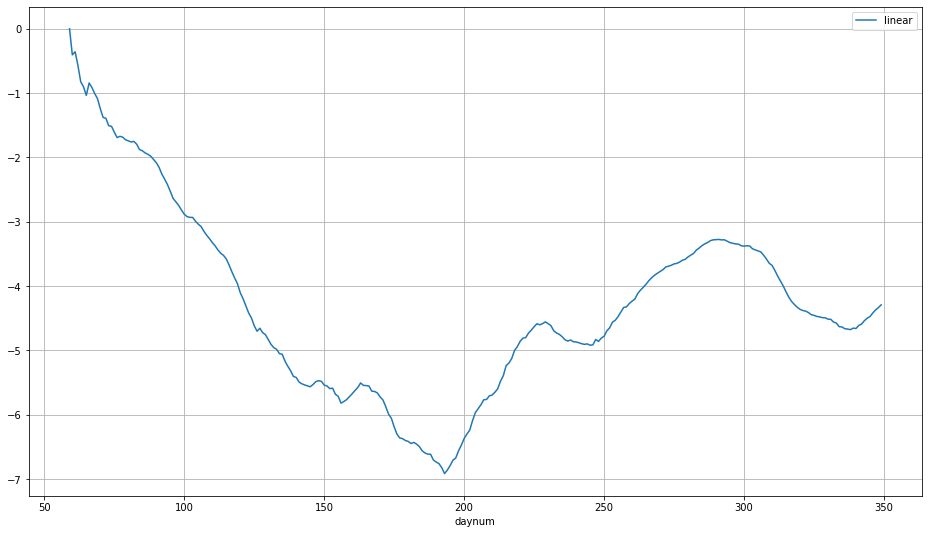

In [13]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
#df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

df_pred['linear'] = np.log(df_pred[(df_pred['gumdiv'] > 0)]['gumdiv'])

#df_pred = df_pred[(df_pred['linear'] < -0.5) &
#                  (df_pred['linear'] > -5.0)]

df_pred.plot(x='daynum', y='linear', figsize=(16, 9), grid=True)

In [14]:
df_pred = df_pred.dropna().copy()
df_pred

daynum        cases    gumdiv    linear
2020-02-28      59     0.142857  1.000000  0.000000
2020-02-29      60     0.285714  0.666667 -0.405465
2020-03-01      61     1.000000  0.700000 -0.356675
2020-03-02      62     1.857143  0.565217 -0.570545
2020-03-03      63     2.571429  0.439024 -0.823200
...            ...          ...       ...       ...
2020-12-10     345  6353.857143  0.011414 -4.472894
2020-12-11     346  6797.571429  0.012064 -4.417528
2020-12-12     347  7220.428571  0.012652 -4.369912
2020-12-13     348  7584.857143  0.013117 -4.333876
2020-12-14     349  8027.571429  0.013692 -4.290934

[291 rows x 4 columns]

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     2.109911  1      2.124  0.000  0.000  
1     0       0    96    0.306666  3      0.313  0.855  0.853  
2     0       0    238   0.146481  5      0.152  0.931  0.929  
3     0       0    129   0.071272  7      0.075  0.966  0.965  
4     0       0    163   0.056000  9      0.060  0.973  0.972  
5     0       0    105   0.037340  11     0.040  0.982  0.981  
6     0       0    272   0.028271  13     0.031  0.987  0.985  
7     0       0    185   0.020131  15     0.022  0.990  0.989  
8     0       0    135   0.016591  17     0.019  0.992  0.991  
9     0       0    82    0.012851  19     0.015  0.994  0.993  
10    0       0    214   0.009985  21     0.012  0.995  0.995  
11    0       0    50    0.007587  23     0.009  0.996  0.996  
12    0       0    5     0.

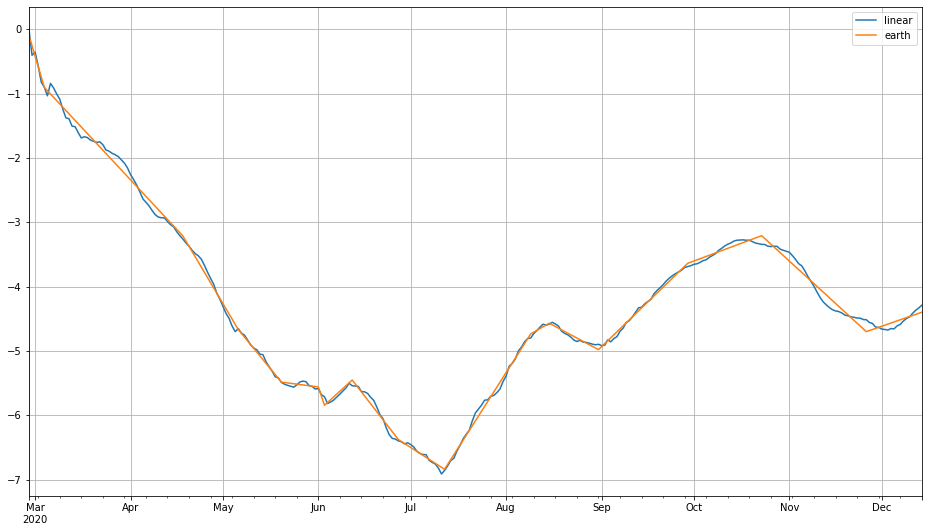

In [15]:
from pyearth import Earth

eax = df_pred['daynum'].values.reshape(-1, 1)
eay = df_pred['linear'].values.reshape(-1, 1)

#model = Earth()
#model = Earth(minspan=0)
model = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
model.fit(eax, eay)

print(model.trace())
print(model.summary())

df_pred['earth'] = model.predict(eax)

daymin = df_pred['daynum'].min()
daymax = df_pred['daynum'].max()
print('From {} to {}'.format(daymin, daymax))

df_pred.plot(y=['linear', 'earth'], figsize=(16, 9), grid=True)

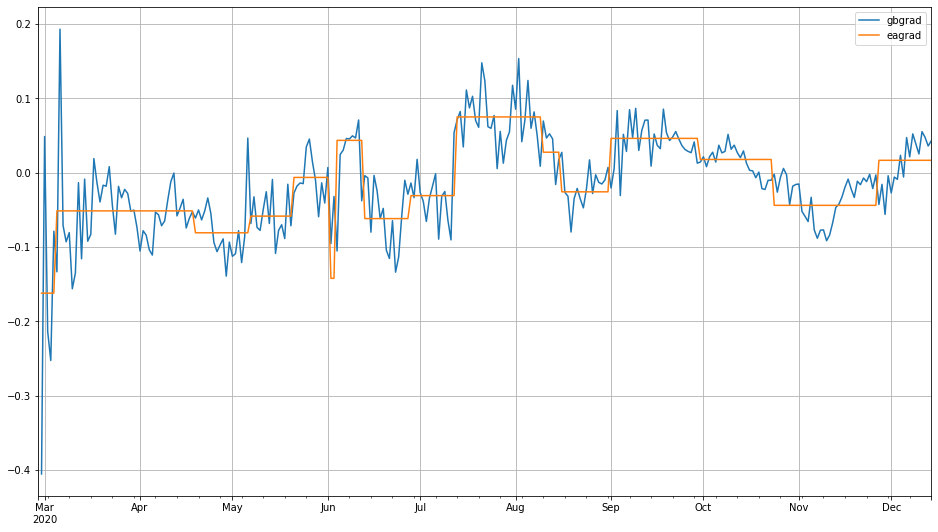

In [16]:
#df_pred['gbgrad'] = np.gradient(df_pred['linear'])
#df_pred['eagrad'] = np.gradient(df_pred['earth'])

df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

df_pred.plot(y=['gbgrad', 'eagrad'], figsize=(16, 9), grid=True)

In [17]:
from pyearth import export
fitmod = export.export_python_function(model)
print(export.export_python_string(model))

def model(example_iterator):
    accessors = [lambda x: 0.26118365770126906,
		lambda x: 0.18573259838600645 * max(0, x[0] - 155.0),
		lambda x: -0.06176394327988856 * max(0, 297.0 - x[0]),
		lambda x: -0.04749844951216629 * max(0, 222.0 - x[0]),
		lambda x: -0.10531504454558377 * max(0, x[0] - 164.0),
		lambda x: 0.060649353864561016 * max(0, 331.0 - x[0]),
		lambda x: 0.07192965460939063 * max(0, x[0] - 244.0),
		lambda x: 0.10593323898777673 * max(0, 194.0 - x[0]),
		lambda x: 0.052088791310079666 * max(0, 141.0 - x[0]),
		lambda x: -0.028381709635278595 * max(0, 273.0 - x[0]),
		lambda x: -0.13560899409284186 * max(0, x[0] - 109.0),
		lambda x: 0.10612574698951205 * max(0, 109.0 - x[0]),
		lambda x: 0.11075051524703229 * max(0, 64.0 - x[0]),
		lambda x: -0.05331297288019825 * max(0, x[0] - 228.0),
		lambda x: 0.022422533959706926 * max(0, x[0] - 127.0),
		lambda x: -0.1358371005000732 * max(0, 153.0 - x[0]),
		lambda x: 0.0309244818679985 * max(0, x[0] - 179.0)]
    for x in exampl

In [18]:
df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                   (df_pred['daynum'] == (daymin + 1)) |
                   (df_pred['daynum'] == daymax))
df_pred['daycount'] = df_pred.reset_index().index
df_pred[df_pred['knot']]

daynum        cases    gumdiv    linear     earth    gbgrad  \
2020-02-29      60     0.285714  0.666667 -0.405465 -0.256390 -0.405465   
2020-03-05      65     5.428571  0.355140 -1.035243 -0.955971 -0.133341   
2020-04-19     110  1025.142857  0.036067 -3.322372 -3.294671 -0.060964   
2020-05-07     128   359.571429  0.008891 -4.722697 -4.726634 -0.068316   
2020-05-21     142   176.571429  0.004015 -5.517778 -5.491818 -0.027215   
2020-06-02     154   157.142857  0.003409 -5.681308 -5.703109 -0.095414   
2020-06-04     156   137.857143  0.002972 -5.818529 -5.801627 -0.105327   
2020-06-13     165   187.000000  0.003903 -5.545911 -5.514473 -0.003911   
2020-06-28     180    81.714286  0.001640 -6.413029 -6.409159 -0.013805   
2020-07-13     195    57.285714  0.001127 -6.787820 -6.764970  0.071255   
2020-08-10     223   503.000000  0.008829 -4.729677 -4.708259  0.069684   
2020-08-16     229   635.714286  0.010506 -4.555801 -4.595661  0.027455   
2020-09-01     245   504.857143  0.007311 -4.918354 -4.934309 -0.020550   
2020-09-30     274  2754.000000  0.025326 -3.675941 -3.620902  0.014462   
2020-10-24     298  8628.857143  0.035217 -3.346221 -3.253382 -0.002095   
2020-11-27     332  5116.142857  0.010477 -4.558579 -4.684554 -0.042707   
2020-12-14     349  8027.571429  0.013692 -4.290934 -4.399426  0.042942   

              eagrad  knot  daycount  
2020-02-29 -0.162066  True         1  
2020-03-05 -0.051316  True         6  
2020-04-19 -0.080799  True        51  
2020-05-07 -0.058377  True        69  
2020-05-21 -0.006288  True        83  
2020-06-02 -0.142125  True        95  
2020-06-04  0.043608  True        97  
2020-06-13 -0.061707  True       106  
2020-06-28 -0.030783  True       121  
2020-07-13  0.075150  True       136  
2020-08-10  0.027652  True       164  
2020-08-16 -0.025661  True       170  
2020-09-01  0.046269  True       186  
2020-09-30  0.017887  True       215  
2020-10-24 -0.043877  True       239  
2020-11-27  0.016772  True       273  
2020-12-14  0.016772  True       290

In [19]:
df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad', measure]]
df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']
df_knot['gradient'] = df_knot[measure].shift(-1) - df_knot[measure]
#df_knot['eadiff'] = df_knot['eagrad'] - df_knot['eagrad'].shift(1)
#df_knot['eamax'] = np.maximum.accumulate(df_knot['eagrad'])

df_knot

daynum  daycount    eagrad        cases  daysdata  daystime  \
2020-02-29      60         1 -0.162066     0.285714       5.0       5.0   
2020-03-05      65         6 -0.051316     5.428571      45.0      45.0   
2020-04-19     110        51 -0.080799  1025.142857      18.0      18.0   
2020-05-07     128        69 -0.058377   359.571429      14.0      14.0   
2020-05-21     142        83 -0.006288   176.571429      12.0      12.0   
2020-06-02     154        95 -0.142125   157.142857       2.0       2.0   
2020-06-04     156        97  0.043608   137.857143       9.0       9.0   
2020-06-13     165       106 -0.061707   187.000000      15.0      15.0   
2020-06-28     180       121 -0.030783    81.714286      15.0      15.0   
2020-07-13     195       136  0.075150    57.285714      28.0      28.0   
2020-08-10     223       164  0.027652   503.000000       6.0       6.0   
2020-08-16     229       170 -0.025661   635.714286      16.0      16.0   
2020-09-01     245       186  0.046269   504.857143      29.0      29.0   
2020-09-30     274       215  0.017887  2754.000000      24.0      24.0   
2020-10-24     298       239 -0.043877  8628.857143      34.0      34.0   
2020-11-27     332       273  0.016772  5116.142857      17.0      17.0   
2020-12-14     349       290  0.016772  8027.571429       NaN       NaN   

               gradient  
2020-02-29     5.142857  
2020-03-05  1019.714286  
2020-04-19  -665.571429  
2020-05-07  -183.000000  
2020-05-21   -19.428571  
2020-06-02   -19.285714  
2020-06-04    49.142857  
2020-06-13  -105.285714  
2020-06-28   -24.428571  
2020-07-13   445.714286  
2020-08-10   132.714286  
2020-08-16  -130.857143  
2020-09-01  2249.142857  
2020-09-30  5874.857143  
2020-10-24 -3512.714286  
2020-11-27  2911.428571  
2020-12-14          NaN

In [20]:
df_knot['cand'] = ((df_knot['daysdata'] >= 3) &
                   (df_knot['eagrad'] < 0) &
                   (df_knot['gradient'] > 0))# &
#                   (df_knot['daysdata'] == df_knot['daystime']))
df_knot

daynum  daycount    eagrad        cases  daysdata  daystime  \
2020-02-29      60         1 -0.162066     0.285714       5.0       5.0   
2020-03-05      65         6 -0.051316     5.428571      45.0      45.0   
2020-04-19     110        51 -0.080799  1025.142857      18.0      18.0   
2020-05-07     128        69 -0.058377   359.571429      14.0      14.0   
2020-05-21     142        83 -0.006288   176.571429      12.0      12.0   
2020-06-02     154        95 -0.142125   157.142857       2.0       2.0   
2020-06-04     156        97  0.043608   137.857143       9.0       9.0   
2020-06-13     165       106 -0.061707   187.000000      15.0      15.0   
2020-06-28     180       121 -0.030783    81.714286      15.0      15.0   
2020-07-13     195       136  0.075150    57.285714      28.0      28.0   
2020-08-10     223       164  0.027652   503.000000       6.0       6.0   
2020-08-16     229       170 -0.025661   635.714286      16.0      16.0   
2020-09-01     245       186  0.046269   504.857143      29.0      29.0   
2020-09-30     274       215  0.017887  2754.000000      24.0      24.0   
2020-10-24     298       239 -0.043877  8628.857143      34.0      34.0   
2020-11-27     332       273  0.016772  5116.142857      17.0      17.0   
2020-12-14     349       290  0.016772  8027.571429       NaN       NaN   

               gradient   cand  
2020-02-29     5.142857   True  
2020-03-05  1019.714286   True  
2020-04-19  -665.571429  False  
2020-05-07  -183.000000  False  
2020-05-21   -19.428571  False  
2020-06-02   -19.285714  False  
2020-06-04    49.142857  False  
2020-06-13  -105.285714  False  
2020-06-28   -24.428571  False  
2020-07-13   445.714286  False  
2020-08-10   132.714286  False  
2020-08-16  -130.857143  False  
2020-09-01  2249.142857  False  
2020-09-30  5874.857143  False  
2020-10-24 -3512.714286  False  
2020-11-27  2911.428571  False  
2020-12-14          NaN  False

In [21]:
df_knot['since'] = df_knot['daynum'] - daymin
#df_knot['score'] = - df_knot['eagrad']
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata'] / df_knot['daystime']
#df_knot['score'] = - df_knot['eagrad'] / df_knot['since']
#df_knot['score'] = (df_knot['eagrad'] ** 2) / np.sqrt(df_knot['since'])
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
df_knot

daynum  daycount    eagrad        cases  daysdata  daystime  \
2020-02-29      60         1 -0.162066     0.285714       5.0       5.0   
2020-03-05      65         6 -0.051316     5.428571      45.0      45.0   
2020-04-19     110        51 -0.080799  1025.142857      18.0      18.0   
2020-05-07     128        69 -0.058377   359.571429      14.0      14.0   
2020-05-21     142        83 -0.006288   176.571429      12.0      12.0   
2020-06-02     154        95 -0.142125   157.142857       2.0       2.0   
2020-06-04     156        97  0.043608   137.857143       9.0       9.0   
2020-06-13     165       106 -0.061707   187.000000      15.0      15.0   
2020-06-28     180       121 -0.030783    81.714286      15.0      15.0   
2020-07-13     195       136  0.075150    57.285714      28.0      28.0   
2020-08-10     223       164  0.027652   503.000000       6.0       6.0   
2020-08-16     229       170 -0.025661   635.714286      16.0      16.0   
2020-09-01     245       186  0.046269   504.857143      29.0      29.0   
2020-09-30     274       215  0.017887  2754.000000      24.0      24.0   
2020-10-24     298       239 -0.043877  8628.857143      34.0      34.0   
2020-11-27     332       273  0.016772  5116.142857      17.0      17.0   
2020-12-14     349       290  0.016772  8027.571429       NaN       NaN   

               gradient   cand  since     score  
2020-02-29     5.142857   True      1  0.058732  
2020-03-05  1019.714286   True      6  0.011287  
2020-04-19  -665.571429  False     51  0.010365  
2020-05-07  -183.000000  False     69  0.004424  
2020-05-21   -19.428571  False     83  0.000045  
2020-06-02   -19.285714  False     95  0.009150  
2020-06-04    49.142857  False     97  0.001818  
2020-06-13  -105.285714  False    106  0.004596  
2020-06-28   -24.428571  False    121  0.001107  
2020-07-13   445.714286  False    136  0.008751  
2020-08-10   132.714286  False    164  0.000523  
2020-08-16  -130.857143  False    170  0.000729  
2020-09-01  2249.142857  False    186  0.003122  
2020-09-30  5874.857143  False    215  0.000409  
2020-10-24 -3512.714286  False    239  0.002855  
2020-11-27  2911.428571  False    273  0.000285  
2020-12-14          NaN  False    290       NaN

In [22]:
df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()
df_knot

daynum  daycount    eagrad        cases  daysdata  daystime  \
2020-02-29      60         1 -0.162066     0.285714       5.0       5.0   
2020-03-05      65         6 -0.051316     5.428571      45.0      45.0   
2020-04-19     110        51 -0.080799  1025.142857      18.0      18.0   
2020-05-07     128        69 -0.058377   359.571429      14.0      14.0   
2020-05-21     142        83 -0.006288   176.571429      12.0      12.0   
2020-06-02     154        95 -0.142125   157.142857       2.0       2.0   
2020-06-04     156        97  0.043608   137.857143       9.0       9.0   
2020-06-13     165       106 -0.061707   187.000000      15.0      15.0   
2020-06-28     180       121 -0.030783    81.714286      15.0      15.0   
2020-07-13     195       136  0.075150    57.285714      28.0      28.0   
2020-08-10     223       164  0.027652   503.000000       6.0       6.0   
2020-08-16     229       170 -0.025661   635.714286      16.0      16.0   
2020-09-01     245       186  0.046269   504.857143      29.0      29.0   
2020-09-30     274       215  0.017887  2754.000000      24.0      24.0   
2020-10-24     298       239 -0.043877  8628.857143      34.0      34.0   
2020-11-27     332       273  0.016772  5116.142857      17.0      17.0   
2020-12-14     349       290  0.016772  8027.571429       NaN       NaN   

               gradient   cand  since     score  choice  
2020-02-29     5.142857   True      1  0.058732    True  
2020-03-05  1019.714286   True      6  0.011287   False  
2020-04-19  -665.571429  False     51  0.010365   False  
2020-05-07  -183.000000  False     69  0.004424   False  
2020-05-21   -19.428571  False     83  0.000045   False  
2020-06-02   -19.285714  False     95  0.009150   False  
2020-06-04    49.142857  False     97  0.001818   False  
2020-06-13  -105.285714  False    106  0.004596   False  
2020-06-28   -24.428571  False    121  0.001107   False  
2020-07-13   445.714286  False    136  0.008751   False  
2020-08-10   132.714286  False    164  0.000523   False  
2020-08-16  -130.857143  False    170  0.000729   False  
2020-09-01  2249.142857  False    186  0.003122   False  
2020-09-30  5874.857143  False    215  0.000409   False  
2020-10-24 -3512.714286  False    239  0.002855   False  
2020-11-27  2911.428571  False    273  0.000285   False  
2020-12-14          NaN  False    290       NaN   False

In [23]:
df_cand = df_knot[df_knot['cand']].copy()
df_cand['lower'] = df_cand['daynum']
df_cand['upper'] = df_cand['lower'] + df_cand['daystime']
#print('From {} to {}'.format(lower, upper))
df_cand.iloc[:]

daynum  daycount    eagrad     cases  daysdata  daystime  \
2020-02-29      60         1 -0.162066  0.285714       5.0       5.0   
2020-03-05      65         6 -0.051316  5.428571      45.0      45.0   

               gradient  cand  since     score  choice  lower  upper  
2020-02-29     5.142857  True      1  0.058732    True     60   65.0  
2020-03-05  1019.714286  True      6  0.011287   False     65  110.0

From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [24]:
#lower = 185
#upper = 187

#df_pred = df_pred[(df_pred['daynum'] >= lower) &
#                  (df_pred['daynum'] <= upper)].copy()

In [25]:
#df_cand['slope'] = (fitmod(df_cand['upper'])[0] - fitmod(df_cand['lower'])[0]) / (df_cand['upper'] - df_cand['lower'])
#df_cand['slope'] = df_cand.apply(lambda x: (fitmod([[x['upper']]])[0] - fitmod([[x['lower']]])[0]) / ([[x['upper']]][0] - [[x['lower']]][0]), axis=1)
df_cand['upval'] = df_cand.apply(lambda x: fitmod([[x['upper']]])[0], axis=1)
df_cand['loval'] = df_cand.apply(lambda x: fitmod([[x['lower']]])[0], axis=1)
df_cand['slope'] = (df_cand['upval'] - df_cand['loval']) / (df_cand['upper'] - df_cand['lower'])
df_cand['inter'] = df_cand['loval'] - (df_cand['lower'] * df_cand['slope'])
df_cand['beta']  = -1 / df_cand['slope']
df_cand['mu']    = df_cand['beta'] * (df_cand['inter'] + np.log(df_cand['beta']))
df_cand

daynum  daycount    eagrad     cases  daysdata  daystime  \
2020-02-29      60         1 -0.162066  0.285714       5.0       5.0   
2020-03-05      65         6 -0.051316  5.428571      45.0      45.0   

               gradient  cand  since     score  choice  lower  upper  \
2020-02-29     5.142857  True      1  0.058732    True     60   65.0   
2020-03-05  1019.714286  True      6  0.011287   False     65  110.0   

               upval     loval     slope     inter       beta          mu  
2020-02-29 -0.955971 -0.256390 -0.139916  8.138591   7.147128   72.223884  
2020-03-05 -3.294671 -0.955971 -0.051971  2.422151  19.241459  103.504007

In [38]:
def gumfit(df, lower, upper, beta, mu, measure):
    df_test = (
        df
        [
            (
                df
                ['daynum']
                >= lower
            )
            &
            (
                df
                ['daynum']
                <= upper
            )
        ]
        .copy()
    )
    df_test['pgumb'] = gumpdf(
        (
            df_test
            ['daynum']
        ),
        beta,
        mu,
    )
    df_test['scale'] = (
        (
            df_test
            [measure]
        )
        /
        (
            df_test
            ['pgumb']
        )
    )
    final = (
        df_test
        ['scale']
        .mean()
    )
    fincv = (
        (
            df_test
            ['scale']
            .std()
        )
        / final
    )
    return(
        final,
        fincv,
    )

df_cand['gumfit'] = (
    df_cand
    .apply(
        lambda x: gumfit(
            df_pred,
            x['lower'],
            x['upper'],
            x['beta'],
            x['mu'],
            measure,
        ),
        axis=1,
    )
)
df_cand['final'] = (
    df_cand
    .apply(
        lambda x: x['gumfit'][0],
        axis=1,
    )
)
df_cand['fincv'] = (
    df_cand
    .apply(
        lambda x: x['gumfit'][1],
        axis=1,
    )
)
df_cand['best'] = (
    (
        df_cand
        ['fincv']
    )
    ==
    (
        df_cand
        ['fincv']
        .min()
    )
)
(
    df_cand
    .transpose()
)

2020-02-29  \
daynum                                         60   
daycount                                        1   
eagrad                                  -0.162066   
cases                                    0.285714   
daysdata                                      5.0   
daystime                                      5.0   
gradient                                 5.142857   
cand                                         True   
since                                           1   
score                                    0.058732   
choice                                       True   
lower                                          60   
upper                                        65.0   
upval                                   -0.955971   
loval                                    -0.25639   
slope                                   -0.139916   
inter                                    8.138591   
beta                                     7.147128   
mu                                      72.223884   
gumfit    (184.7105813463085, 0.2545087643606562)   
final                                  184.710581   
fincv                                    0.254509   
best                                        False   

                                        2020-03-05  
daynum                                          65  
daycount                                         6  
eagrad                                   -0.051316  
cases                                     5.428571  
daysdata                                      45.0  
daystime                                      45.0  
gradient                               1019.714286  
cand                                          True  
since                                            6  
score                                     0.011287  
choice                                       False  
lower                                           65  
upper                                        110.0  
upval                                    -3.294671  
loval                                    -0.955971  
slope                                    -0.051971  
inter                                     2.422151  
beta                                     19.241459  
mu                                      103.504007  
gumfit    (51815.92228779859, 0.19400501685448757)  
final                                 51815.922288  
fincv                                     0.194005  
best                                          True

In [42]:
choice = (
    df_cand
    [
        df_cand
        ['best']
    ]
)
beta = (
    choice
    ['beta']
    .values[0]
)
mu = (
    choice
    ['mu']
    .values[0]
)
final = (
    choice
    ['final']
    .values[0]
)
fincv = (
    choice
    ['fincv']
    .values[0]
)
#final, fincv = gumfit(df_pred, choice['lower'].values[0], choice['upper'].values[0], beta, mu, measure)
print(
    beta,
    mu,
    final,
    (1 - (fincv **2)),
)

19.241458788606906 103.50400665264694 51815.92228779859 0.96236205343529


Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

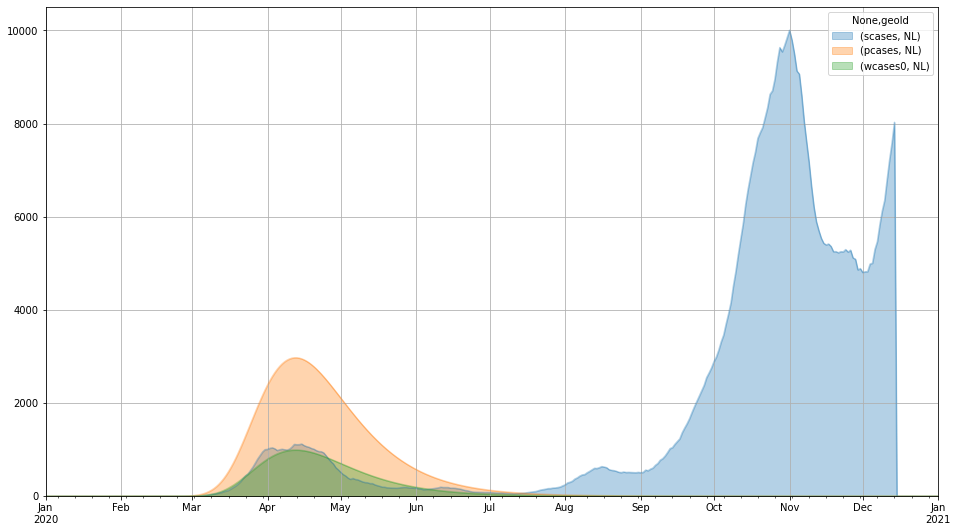

In [45]:
df_geo[(curwave, country)] = gumpdf(
    (
        df_geo
        ['daynum']
    ),
    beta,
    mu,
) * final
df_geo[(pmeasure, country)] += (
    df_geo
    [(curwave, country)]
)
(
    df_geo
    [plotlist]
    .loc['20200101':'20210101']
    .plot(
        figsize=(16, 9),
        grid=True,
        kind='area',
        stacked=False,
        alpha=1/3,
    )
)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

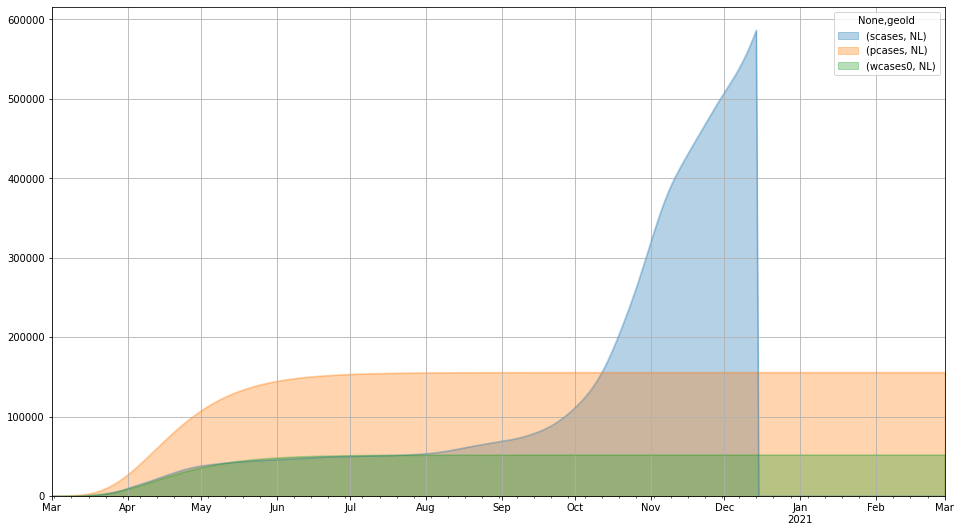

In [46]:
(
    df_geo
    [plotlist]
    .loc['20200301':'20210301']
    .cumsum()
    .plot(
        figsize=(16, 9),
        grid=True,
        kind='area',
        stacked=False,
        alpha=1/3,
    )
)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [30]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 331733.03% of 185


The peak can be found at the first predicted value that is larger than the next.

In [31]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-03-12


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [32]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-03-12


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [33]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-03-13


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [34]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at NaT


We define the maximum delta as the day in the curve with the sharpest rise.

In [35]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 1 on 2020-03-06


This should match the maximum gradient of the daily data.

In [36]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 1


Back to the original curve, showing the number of infected concurrently.

ValueError: zero-size array to reduction operation fmin which has no identity

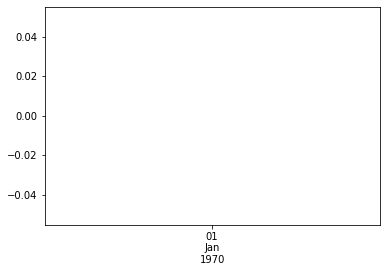

In [37]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [ ]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

In [ ]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [ ]:
df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]

Keep exploring! Stay home, wash your hands, keep your distance.